# Lab 2: Introduction to Data
## Name
---

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Exercise 1

Look carefully at these three histograms. How do they compare? Are features revealed in one that are obscured in another?

---

Type response here.

C:\Users\rcampbelliii\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Departure Delay Times Histogram with 5 Bins')

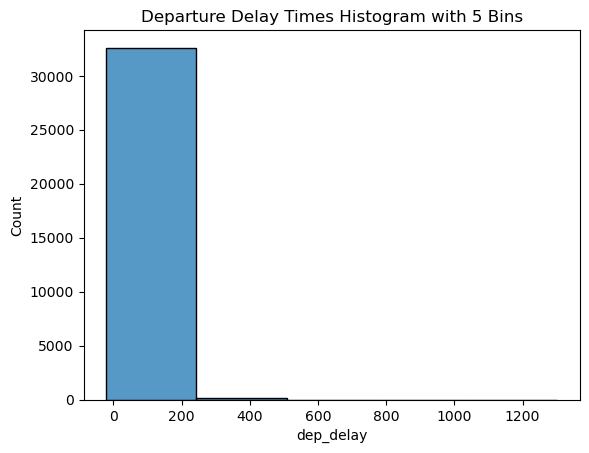

In [2]:
nycflights = pd.read_csv("nycflights.csv", na_values='NaN')

sns.histplot(data=nycflights['dep_delay'], bins=5).set_title('Departure Delay Times Histogram with 5 Bins')
#nycflights['dep_delay'].plot(kind='hist',bins=5)
#plt.title('Departure Delay Times Histogram with 5 Bins')

#plt.show()

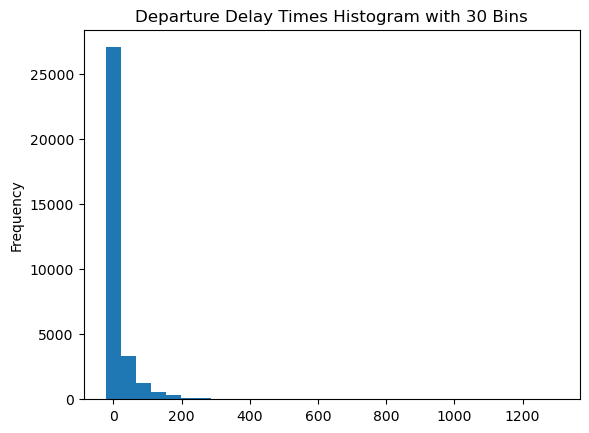

In [3]:
nycflights['dep_delay'].plot(kind='hist',bins=30)
plt.title('Departure Delay Times Histogram with 30 Bins')

plt.show()

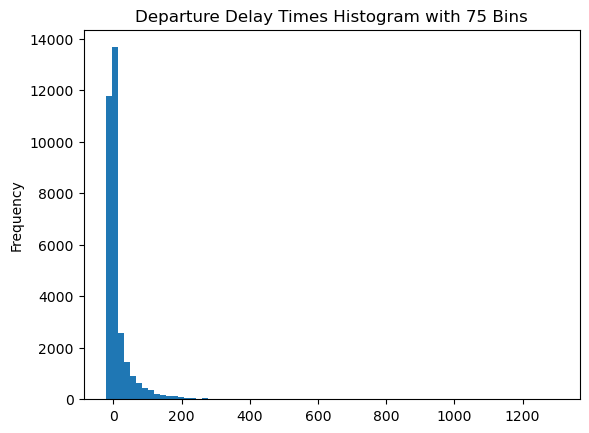

In [4]:
nycflights['dep_delay'].plot(kind='hist',bins=75)
plt.title('Departure Delay Times Histogram with 75 Bins')

plt.show()

# Exercise 2

Create a new data frame that includes flights headed to SFO in February, and save this data frame as sfo_feb_flights. How many flights meet these criteria?

---

Type response here.

In [5]:
sfo_feb_flights = nycflights[(nycflights.dest == "SFO") & (nycflights.month == 2)]

sfo_feb_flights.describe()

,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,flight,air_time,distance,hour,minute,avg_speed
count,68.000000,68.0,68.0,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000
mean,17274.161765,2013.0,2.0,15.264706,1298.117647,10.500000,1607.294118,-4.500000,795.058824,351.882353,2583.529412,12.617647,36.352941,441.119330
std,8507.942434,0.0,0.0,8.468762,462.709429,33.279683,476.904166,36.280623,742.486944,12.958636,6.816290,4.652168,16.696380,16.536753
min,536.000000,2013.0,2.0,1.000000,613.000000,-10.000000,118.000000,-66.000000,11.000000,317.000000,2565.000000,6.000000,1.000000,412.659574
25%,11715.250000,2013.0,2.0,7.000000,943.000000,-5.000000,1233.250000,-21.250000,85.000000,345.000000,2586.000000,9.000000,25.000000,431.000000
50%,17951.000000,2013.0,2.0,16.000000,1268.500000,-2.000000,1497.000000,-11.000000,641.000000,354.000000,2586.000000,12.500000,33.500000,437.687754
75%,23329.000000,2013.0,2.0,22.500000,1742.000000,9.000000,2062.500000,2.000000,1487.250000,360.000000,2586.000000,17.000000,54.000000,449.739130
max,31511.000000,2013.0,2.0,28.000000,2159.000000,209.000000,2256.000000,196.000000,2126.000000,376.000000,2586.000000,21.000000,59.000000,487.924528


# Exercise 3

Describe the distribution of the arrival delays of these flights using a histogram and appropriate summary statistics.

---

Type response here.

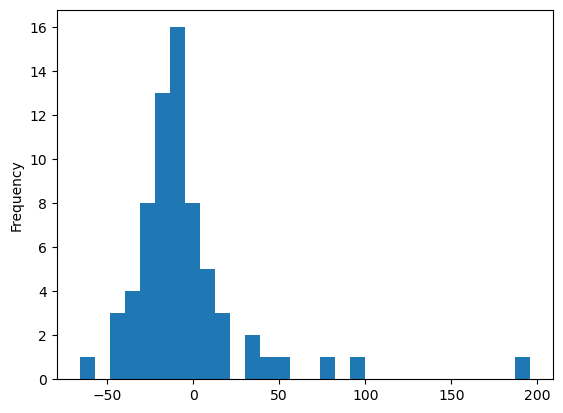

In [6]:
sfo_feb_flights['arr_delay'].plot(kind='hist',bins=30)

plt.show()

# Exercise 4

Calculate the median and interquartile range for arr_delays of flights in the sfo_feb_flights data frame, grouped by carrier. Which carrier has the most variable arrival delays?

---

Type response here.

In [7]:
sfo_feb_flights[['carrier', 'arr_delay']].groupby('carrier').describe()

arr_delay                                                       
            count       mean        std   min    25%   50%    75%    max
carrier                                                                 
AA           10.0  11.500000  29.470324 -26.0  -2.00   5.0  15.50   76.0
B6            6.0  -6.333333  10.984838 -18.0 -12.50 -10.5  -0.25   11.0
DL           19.0 -13.473684  22.028689 -48.0 -27.50 -15.0  -5.50   48.0
UA           21.0   1.809524  48.326617 -35.0 -20.00 -10.0   2.00  196.0
VX           12.0 -13.750000  40.848111 -66.0 -32.25 -22.5 -11.00   99.0

# Exercise 5

Suppose you really dislike departure delays and you want to schedule your travel in a month that minimizes your potential departure delay leaving NYC. One option is to choose the month with the lowest mean departure delay. Another option is to choose the month with the lowest median departure delay. What are the pros and cons of these two choices?

---

Type response here.

In [8]:
nycflights[['month', 'dep_delay']].groupby('month').mean().sort_values('dep_delay')

,dep_delay
month,
10,5.880374
11,6.103183
9,6.872436
1,10.233333
2,10.687227
8,12.619097
5,13.264800
3,13.517602
4,14.554477


In [9]:
nycflights[['month', 'dep_delay']].groupby('month').median().sort_values('dep_delay')

,dep_delay
month,
9,-3.0
10,-3.0
1,-2.0
2,-2.0
4,-2.0
11,-2.0
3,-1.0
5,-1.0
8,-1.0


# Exercise 6

If you were selecting an airport simply based on on time departure percentage, which NYC airport would you choose to fly out of?

---

Type response here.

In [10]:
nycflights['dep_type'] = nycflights.apply(lambda row: 'on time' if row.dep_delay < 5 else 'delayed', axis=1)

nycflights[['origin', 'dep_type']].groupby('origin').value_counts(normalize=True)

origin  dep_type
EWR     on time     0.636989
        delayed     0.363011
JFK     on time     0.693585
        delayed     0.306415
LGA     on time     0.727923
        delayed     0.272077
Name: proportion, dtype: float64

# Exercise 7

Modify the data frame so that it includes a new variable that contains the average speed, avg_speed, traveled by the plane for each flight (in mph).

In [11]:
nycflights['avg_speed'] = nycflights.apply(lambda row: row.distance / (row.air_time / 60), axis=1)

# Exercise 8

Make a scatterplot of avg_speed vs. distance. Describe the relationship between average speed and distance.

---

Type response here.

<Axes: xlabel='distance', ylabel='avg_speed'>

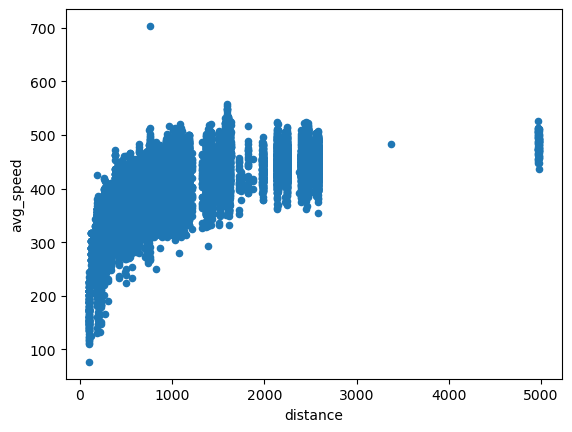

In [12]:
nycflights[['avg_speed', 'distance']].plot(x='distance', y='avg_speed', kind='scatter')

# Exercise 9

Replicate the following plot.

<Axes: xlabel='dep_delay', ylabel='arr_delay'>

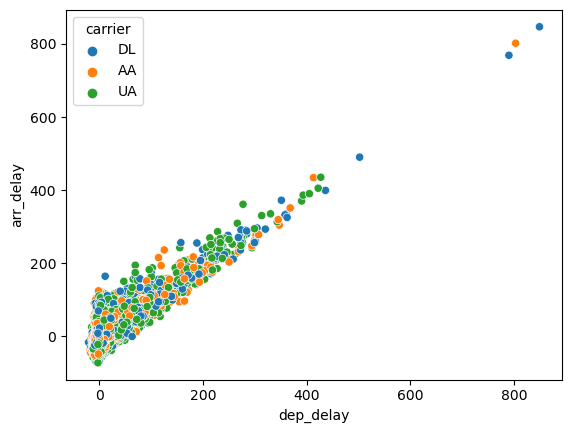

In [13]:
sns.scatterplot(x='dep_delay', y='arr_delay', data=nycflights[(nycflights.carrier == 'AA') | (nycflights.carrier == 'UA') | (nycflights.carrier == 'DL')], hue='carrier')